In [4]:
import time
import pickle

import numpy as np

%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from utils import *
from q_learning import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Configurations
save_stats = False
save_figs = True
train = False
load = not train

seed = 0

## 2. Q-Learning

In [6]:
env = TictactoeEnv()

# Hyper-parameters
alpha = 0.05    # Learning rate
gamma = 0.99    # Discount factor
epsilon_opt = 0.5   # Optimal player's epsilon
num_episodes = 20000 # number of episodes
num_avg = 10 # training runs
test_freq = 250

### 2.1 Learning from experts

#### Question 1: Average reward with $\epsilon = 0.1$

In [4]:
np.random.seed(seed)
epsilon_exploration = 0.1
rewards_list = []
for i in range(num_avg):
    print('************** RUN', i+1, 'OF', num_avg, '**************')
    start = time.time()
    Q, stats = q_learning(env, epsilon_exploration=epsilon_exploration, num_episodes=num_episodes, verbose=False, against_opt=True)
    rewards_list.append(stats['rewards'])
    print('RUN', i+1, 'took', np.round(time.time()-start,decimals=1), 'seconds')

************** RUN 1 OF 10 **************


KeyboardInterrupt: 

In [19]:
# Plotting the average reward for every 250 games during training
running_rewards_list = []
for reward in rewards_list:
    running_average_rewards, x = running_average(reward)
    running_rewards_list.append(running_average_rewards)

running_average_rewards = np.mean(running_rewards_list, axis=0)
stds = np.std(running_rewards_list, axis=0)
fig = plt.figure()
plt.plot(x, running_average_rewards)
plt.fill_between(x, running_average_rewards - stds, running_average_rewards + stds, alpha=0.2)
plt.ylim([-1,1])
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Average reward during training')
plt.show()
if save_figs:
        output_folder = os.path.join(os.getcwd(), 'figures')
        os.makedirs(output_folder, exist_ok=True)
        fig.savefig(output_folder + '/rewards_Q1.png')
        fig.savefig(output_folder + '/rewards_Q1.eps', format = 'eps')

# Comparing the performance with the optimal player and the random player
turns = np.array(['X','O'])
player_opt = OptimalPlayer(epsilon=0.)
player_rand = OptimalPlayer(epsilon=1.)
teacher = OptimalPlayer(epsilon=0.5)

names = ['Trained', 'Optimal', 'Random']
players = [QPlayer(Q=Q), OptimalPlayer(epsilon=0.), OptimalPlayer(epsilon=1.)]

for (name, player) in zip(names, players):
    print("\n-----", name, " player-----")
    m_opt = measure_performance(player, player_opt)
    print("M_opt = ", m_opt)
    m_rand = measure_performance(player, player_rand)
    print("M_rand = ", m_rand)
    m_teacher = measure_performance(player, teacher)
    print("M_teacher = ", m_teacher)

C:\Users\Federico Betti\anaconda3\envs\CS456\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
C:\Users\Federico Betti\anaconda3\envs\CS456\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Federico Betti\anaconda3\envs\CS456\lib\site-packages\numpy\core\_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
C:\Users\Federico Betti\anaconda3\envs\CS456\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Federico Betti\anaconda3\envs\CS456\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars


NameError: name 'x' is not defined

<Figure size 432x288 with 0 Axes>

#### Questions 2 and 3: Decreasing exploration for different values of $n^{*}$

In [15]:
test_freq = 250
epsilon_min = 0.1
epsilon_max = 0.8
vec_n_star = np.hstack((np.array([1, 100, 500, 750]), np.round(np.logspace(3, np.log10(40000), 16))))

In [ ]:
vec_n_star_first = vec_n_star[:10]
var_name = 'nstar_first'
q_learning_params_list = []
for n_star in vec_n_star_first:
    params = {'env': env,
              'num_episodes': num_episodes,
              'epsilon_exploration_rule': return_lambda_explor(epsilon_min, epsilon_max, n_star),
              'test_freq': test_freq,
              'against_opt': True}
    q_learning_params_list.append(params)

In [ ]:
if train:
    stats_dict_nstar_first_list = train_avg(var_name, vec_n_star_first, q_learning_params_list, num_avg=num_avg, save_stats=save_stats)

In [ ]:
var_name = 'nstar_second'
vec_n_star_second = vec_n_star[10:]
q_learning_params_list = []
for n_star in vec_n_star_second:
    params = {'env': env,
              'num_episodes': num_episodes,
              'epsilon_exploration_rule': return_lambda_explor(epsilon_min, epsilon_max, n_star),
              'test_freq': test_freq,
              'against_opt': True}
    q_learning_params_list.append(params)

In [ ]:
if train:
    stats_dict_nstar_second_list = train_avg(var_name, vec_n_star_second, q_learning_params_list, num_avg=num_avg, save_stats=save_stats)

In [7]:
# Merge
if save_stats:
    stats_dict_nstar_list = []
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/stats_dict_nstar_first_list.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_nstar_first_list = pickle.load(handle)
    fname = output_folder + '/stats_dict_nstar_second_list.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_nstar_second_list = pickle.load(handle)
        for i in range(len(stats_dict_nstar_second_list)):
            stats_dict_nstar_list.append({**stats_dict_nstar_first_list[i], **stats_dict_nstar_second_list[i]})
    fname = output_folder + '/stats_dict_nstar_list.pkl'
    with open(fname, 'wb') as handle:
        pickle.dump(stats_dict_nstar_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

n_star = 1.0 : 	M_opt =  -0.056600000000000004 	M_rand =  0.7432
n_star = 9146.0 : 	M_opt =  -0.0722 	M_rand =  0.8100000000000002
n_star = 19127.0 : 	M_opt =  -0.129 	M_rand =  0.7644
n_star = 40000 : 	M_opt =  -0.22240000000000001 	M_rand =  0.6992


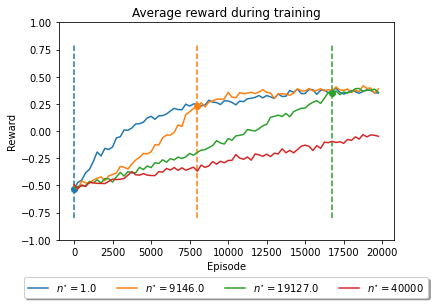

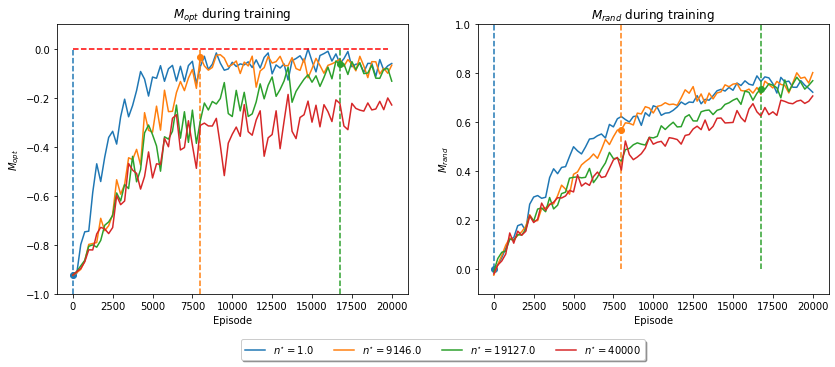

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [8]:
if load:
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/stats_dict_nstar_list.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_nstar_list = pickle.load(handle)

plot_n_star = [1., 9146., 19127., 40000]
plot_stats(stats_dict_nstar_list, plot_n_star, 'n_star', "n^{\star}", save=save_figs, decaying_exploration=True)

##### Plot for all the experimented values

In [ ]:
plot_stats(stats_dict_nstar_list, vec_n_star, 'n_star', "n^{\star}", save=False)

#### Questions 4: Good experts and bad experts

In [11]:
n_star = 19172 # we pick the best according to previous experiments
M = 11
var_name = 'epsilon_opt'
vec_epsilon_opt = np.round(np.linspace(0, 1, M), decimals=2)
q_learning_params_list = []
for epsilon_opt in vec_epsilon_opt:
    params = {'env': env,
              'num_episodes': num_episodes,
              'epsilon_exploration_rule': return_lambda_explor(epsilon_min, epsilon_max, n_star),
              'test_freq': 250,
              'epsilon_opt': epsilon_opt,
              'against_opt': True}
    q_learning_params_list.append(params)

NameError: name 'epsilon_min' is not defined

In [ ]:
if train:
    stats_dict_eps_opt_list = train_avg(var_name, vec_epsilon_opt, q_learning_params_list, num_avg=num_avg, save_stats=save_stats)

epsilon_opt = 0.0 : 	M_opt =  0.0 	M_rand =  0.12224999999999998
epsilon_opt = 0.5 : 	M_opt =  -0.0875 	M_rand =  0.7715000000000001
epsilon_opt = 1.0 : 	M_opt =  -0.56025 	M_rand =  0.8119999999999999


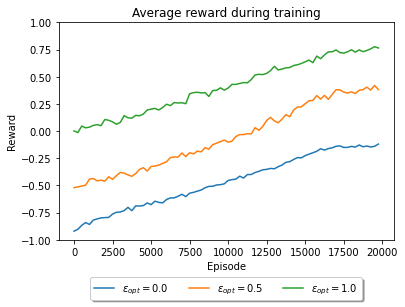

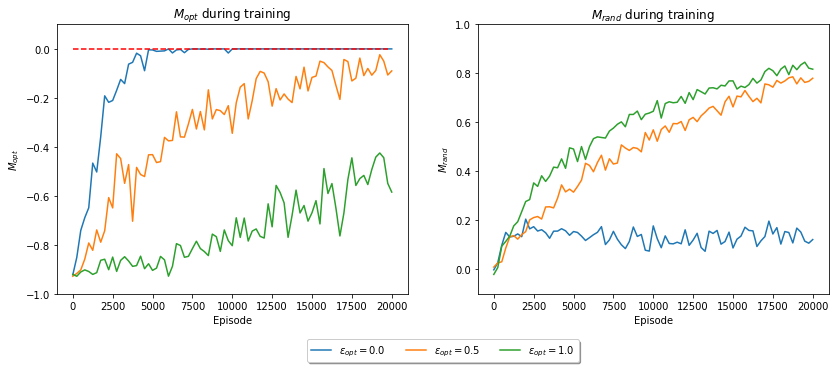

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [9]:
if load:
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/stats_dict_epsilon_opt_list.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_eps_opt_list = pickle.load(handle)

plot_epsilon_opt = [0., 0.5, 1.]
plot_stats(stats_dict_eps_opt_list, plot_epsilon_opt, "epsilon_opt", "\epsilon_{opt}", save=save_figs)

##### Plot for all the experimented values

epsilon_opt = 0.0 : 	M_opt =  0.0 	M_rand =  0.12224999999999998
epsilon_opt = 0.1 : 	M_opt =  0.0 	M_rand =  0.46075
epsilon_opt = 0.2 : 	M_opt =  0.0 	M_rand =  0.5387500000000001
epsilon_opt = 0.3 : 	M_opt =  0.0 	M_rand =  0.64075
epsilon_opt = 0.4 : 	M_opt =  -0.04775 	M_rand =  0.723
epsilon_opt = 0.5 : 	M_opt =  -0.0875 	M_rand =  0.7715000000000001
epsilon_opt = 0.6 : 	M_opt =  -0.0935 	M_rand =  0.836
epsilon_opt = 0.7 : 	M_opt =  -0.152 	M_rand =  0.8425
epsilon_opt = 0.8 : 	M_opt =  -0.30225 	M_rand =  0.83675
epsilon_opt = 0.9 : 	M_opt =  -0.17099999999999999 	M_rand =  0.83375
epsilon_opt = 1.0 : 	M_opt =  -0.56025 	M_rand =  0.8119999999999999


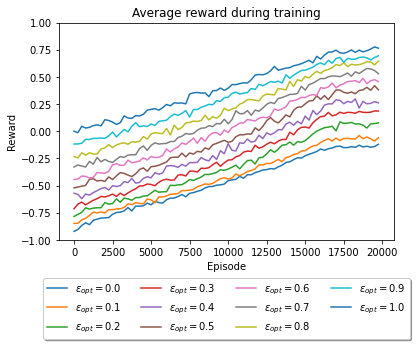

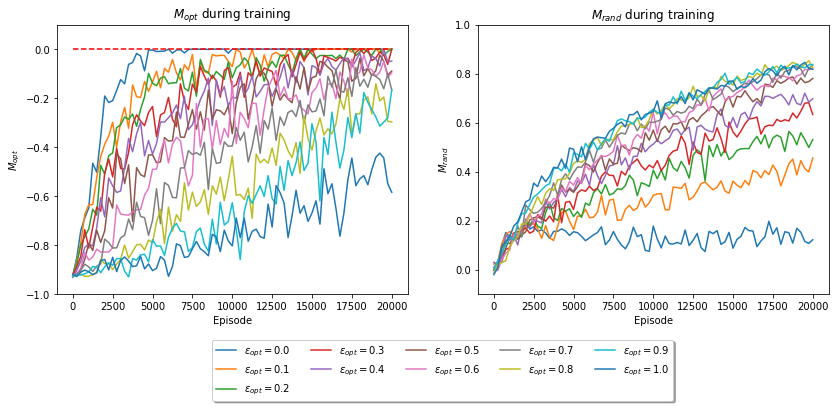

In [16]:
plot_stats(stats_dict_eps_opt_list, vec_epsilon_opt, "epsilon_opt", "\epsilon_{opt}", save=False)

#### Question 5: Optimal values of $M_{\text{opt}}$ and $M_{\text{rand}}$

In [ ]:
np.random.seed(seed)
n_star = 19172
epsilon_min = 0.1
epsilon_max = 0.8
Q, stats = q_learning(env, num_episodes=20000, epsilon_exploration_rule=return_lambda_explor(epsilon_min, epsilon_max, n_star),
                      test_freq=20000, verbose=False, epsilon_opt=0.5, against_opt=True)

In [ ]:
print(max(stats['test_Mopt']), max(stats['test_Mrand']))

### 2.2 Learning by self-practice

#### Question 7: Self-learning with constant rate of exploration $\epsilon$

In [ ]:
epsilon_vec = np.array([0, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1])
var_name = 'eps_self'
q_learning_params_list = []
for eps in epsilon_vec:
    params = {'env': env,
              'num_episodes': num_episodes,
              'epsilon_exploration': eps,
              'test_freq': test_freq,
              'self_practice': True }
    q_learning_params_list.append(params)
# epsilon_vec = np.hstack((epsilon_vec_plot, np.setdiff1d(np.logspace(-4, -1, 10), epsilon_vec_plot)))

In [ ]:
if train:
    stats_dict_eps_self_list = train_avg(var_name, epsilon_vec, q_learning_params_list, num_avg=num_avg, save_stats=save_stats)

epsilon_self = 0 : 	M_opt =  -0.8786666666666667 	M_rand =  0.17555555555555558
epsilon_self = 0.01 : 	M_opt =  -0.20688888888888887 	M_rand =  0.8102222222222222
epsilon_self = 0.1 : 	M_opt =  -0.02288888888888889 	M_rand =  0.8964444444444444
epsilon_self = 0.5 : 	M_opt =  -0.44466666666666665 	M_rand =  0.8022222222222223


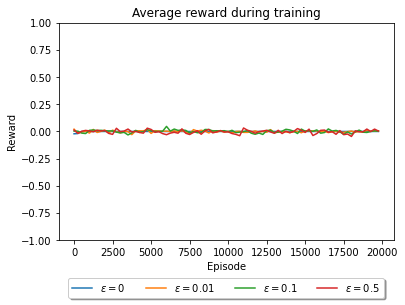

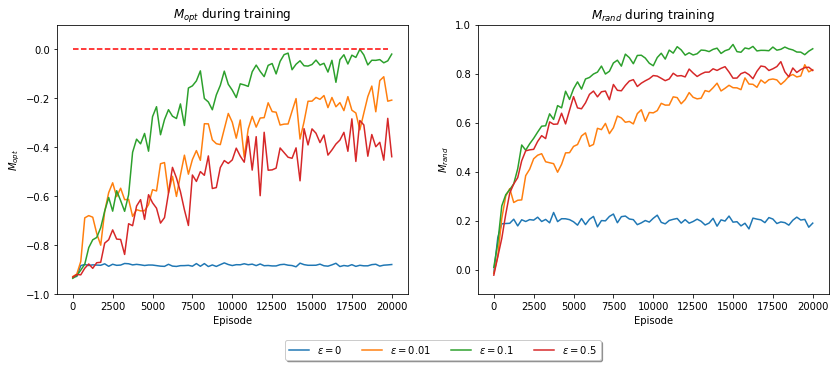

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [18]:
if load:
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/stats_dict_eps_self_list.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_eps_self_list = pickle.load(handle)

epsilon_vec_plot = [0, 0.01, 0.1, 0.5] # are these okay?
plot_stats(stats_dict_eps_self_list, epsilon_vec_plot, "epsilon_self", "\epsilon", save=save_figs)

##### Plot for all the experimented values

In [ ]:
plot_stats(stats_dict_eps_self_list, epsilon_vec, "epsilon_self", "\epsilon", save=False)

#### Question 8: Decaying exploration rule for different values of $n^*$

In [ ]:
epsilon_min = 0.1
epsilon_max = 0.8
vec_n_star = np.hstack((np.array([1, 100, 500, 750]), np.round(np.logspace(3, np.log10(40000), 16))))

In [ ]:
var_name = 'nstar_first_self'
vec_n_star_first = vec_n_star[:10]
q_learning_params_list = []
for n_star in vec_n_star_first:
    params = {'env': env,
              'num_episodes': num_episodes,
              'epsilon_exploration_rule': return_lambda_explor(epsilon_min, epsilon_max, n_star),
              'test_freq': test_freq,
              'self_practice': True}
    q_learning_params_list.append(params)

In [ ]:
if train:
    stats_dict_nstar_self_first_list = train_avg(var_name, vec_n_star_first, q_learning_params_list, num_avg=num_avg, save_stats=save_stats)

In [ ]:
var_name = 'nstar_second_self'
vec_n_star_second = vec_n_star[10:]
q_learning_params_list = []
for n_star in vec_n_star_second:
    params = {'env': env,
              'num_episodes': num_episodes,
              'epsilon_exploration_rule': (return_lambda_explor(epsilon_min, epsilon_max, n_star)),
              'test_freq': test_freq,
              'self_practice': True}
    q_learning_params_list.append(params)

In [ ]:
if train:
    stats_dict_nstar_test = train_avg(var_name, vec_n_star_second, q_learning_params_list, num_avg=num_avg, save_stats=save_stats)

In [ ]:
# Merge
if save_stats:
    stats_dict_nstar_self_list = []
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/stats_dict_nstar_first_self_list.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_nstar_first_self_list = pickle.load(handle)
    fname = output_folder + '/stats_dict_nstar_second_self_list.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_nstar_second_self_list = pickle.load(handle)
        for i in range(len(stats_dict_nstar_second_self_list)):
            stats_dict_nstar_self_list.append({**stats_dict_nstar_first_self_list[i], **stats_dict_nstar_second_self_list[i]})
    fname = output_folder + '/stats_dict_nstar_self_list.pkl'
    with open(fname, 'wb') as handle:
        pickle.dump(stats_dict_nstar_self_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
if load:
    output_folder = os.path.join(os.getcwd(), 'results')
    os.makedirs(output_folder, exist_ok=True)
    fname = output_folder + '/stats_dict_nstar_self_list.pkl'
    with open(fname, 'rb') as handle:
        stats_dict_nstar_self_list = pickle.load(handle)

plot_n_star = [1., 9146., 19127., 40000]
plot_stats(stats_dict_nstar_self_list, plot_n_star, 'n_star_self', "n^{\star}", decaying_exploration=True, save=save_figs)

##### Plot for all the experimented values

In [ ]:
plot_stats(stats_dict_nstar_self_list, vec_n_star, 'n_star_self', "n^{\star}", save=False)

#### Optimal values of $M_{\text{opt}}$ and $M_{\text{rand}}$

In [17]:
np.random.seed(seed)
n_star = 19172
epsilon_min = 0.1
epsilon_max = 0.8
Q, stats = q_learning(env, num_episodes=20000, epsilon_exploration_rule=return_lambda_explor(epsilon_min, epsilon_max, n_star),
                      test_freq=20000, verbose=False, self_practice=True)

In [18]:
print(max(stats['test_Mopt']), max(stats['test_Mrand']))

0.0 0.95


#### Question 10: Heatmaps of the Q-values in 3 significant states

In [ ]:
# Parametri ottimali di Q
np.random.seed(seed)
epsilon_min = 0.1
epsilon_max = 0.8
n_star = 19127.
epsilon_exploration_rule = return_lambda_explor(epsilon_min, epsilon_max, n_star)
Q, stats = q_learning(env, epsilon_exploration_rule=epsilon_exploration_rule, num_episodes=20000, verbose=True, self_practice=True)

In [ ]:
grids = [[1., 0., 0., -1., 1., 0., 0., -1., 0.], [-1., 0., 0., 1., -1., 0., 0., 1., 0.], [1., -1., 0., 0., 0., 0., 0., 0., 0.]]
heatmaps_subplots(grids, Q, save=save_figs)

## Deep Q-Learning